In [ ]:
!unzip 'archive (13).zip'

Standard library import

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

Import the required data

In [3]:
df = pd.read_csv('spam.csv', encoding = 'latin-1')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df.columns = ['SpamHam', 'SMS']

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SpamHam', ylabel='count'>

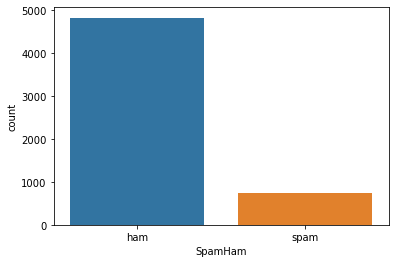

In [12]:
sns.countplot(df['SpamHam'])

In [13]:
df.head()

,SpamHam,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
nltk.download('stopwords')
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 
nltk.download('wordnet')
def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)

[nltk_data] Downloading package stopwords to /home/studio-lab-
[nltk_data]     user/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /home/studio-lab-
[nltk_data]     user/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [17]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /home/studio-lab-
[nltk_data]     user/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


True

In [18]:
X = df['SMS'].map(lambda s: preprocess(s))

In [20]:
X

0       jurong point crazy available bugis great world...
1                                      lar joking wif oni
2       free entry wkly comp win cup final tkts may te...
3                           dun say early hor already say
4                  nah think goes usf lives around though
                              ...                        
5567    time tried contact pound prize claim easy call...
5568                                 going esplanade home
5569                                pity mood suggestions
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Name: SMS, Length: 5572, dtype: object

In [21]:
vect = TfidfVectorizer()

In [22]:
X = vect.fit_transform(X)

In [23]:
X.shape

(5572, 7386)

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(df['SpamHam'])

In [26]:
Y.shape

(5572,)

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.15, random_state = 1234)

In [33]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4736, 7386)
(836, 7386)
(4736,)
(836,)


Implementation NB Classifier

In [31]:
X = X.toarray()

In [34]:
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [35]:
preds_nb = nb.predict(x_test)

In [36]:
cm_nb = confusion_matrix(y_test, preds_nb)
acc_nb = accuracy_score(y_test, preds_nb)
clasrep_nb = classification_report(y_test, preds_nb)

In [37]:
print(cm_nb)
print(acc_nb)
print(clasrep_nb)

[[625  83]
 [ 14 114]]
0.8839712918660287
              precision    recall  f1-score   support

           0       0.98      0.88      0.93       708
           1       0.58      0.89      0.70       128

    accuracy                           0.88       836
   macro avg       0.78      0.89      0.81       836
weighted avg       0.92      0.88      0.89       836

